In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
import pandas as pd
import seaborn as sns
from IPython.display import display
from scipy.stats import gaussian_kde

from sklearn.compose import ColumnTransformer , make_column_transformer, TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer,PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,QuantileTransformer,PowerTransformer
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,log_loss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error,f1_score,accuracy_score
import category_encoders as ce
#pip install category-encoders
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

from category_encoders import TargetEncoder
from sklearn.linear_model import ElasticNet, Ridge, Lasso, Lars,SGDRegressor,LogisticRegression
from sklearn.svm import SVR,SVC

from sklearn.ensemble import VotingRegressor,VotingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier,GradientBoostingRegressor,RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier


from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_wine
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder,FunctionTransformer

from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import SelectKBest, f_classif
#from mlxtend.feature_selection import SequentialFeatureSelector
import shap
#pip install shap

import pickle

In [4]:
path_train = 'train_house_B.csv'
path_test = 'test_house_B.csv'

In [5]:
df = pd.read_csv(path_train)
test = pd.read_csv(path_test)
selected_feat2 = ['2', '12', '18', '19', '20', '21', '22', '24', '25', '27']

In [6]:
X = df[selected_feat2]
y =df['price']

In [7]:
coltrans = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_feat2)],

    remainder='drop'
).set_output(transform="pandas")

display(coltrans)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['2', '12', '18', '19', '20', '21', '22', '24',
                                  '25', '27'])])

In [8]:
model_baseline = TransformedTargetRegressor(
                        regressor = Pipeline(steps = [
                          ('preproc',coltrans),
                        ('estimator',SVR(kernel = 'linear'))
                        ]),
    transformer =PowerTransformer() )

model_baseline.fit(X,y)


TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       StandardScaler(),
                                                                                       ['2',
                                                                                        '12',
                                                                                        '18',
                                                                                        '19',
                                                                                        '20',
                                                                                        '21',
                                                                                        '22',
                                                                                        '24',
                                                                                        '25',
                                                                                        '27'])])),
                                                     ('estimator',
                                                      SVR(kernel='linear'))]),
                           transformer=PowerTransformer())

In [9]:
y_predict = model_baseline.predict(test[selected_feat2])

(137,) (137,)
Отрицательные цены -  0
Max Error: 5,618,950
 
----------------------
   MAPE Error: 17.39
----------------------


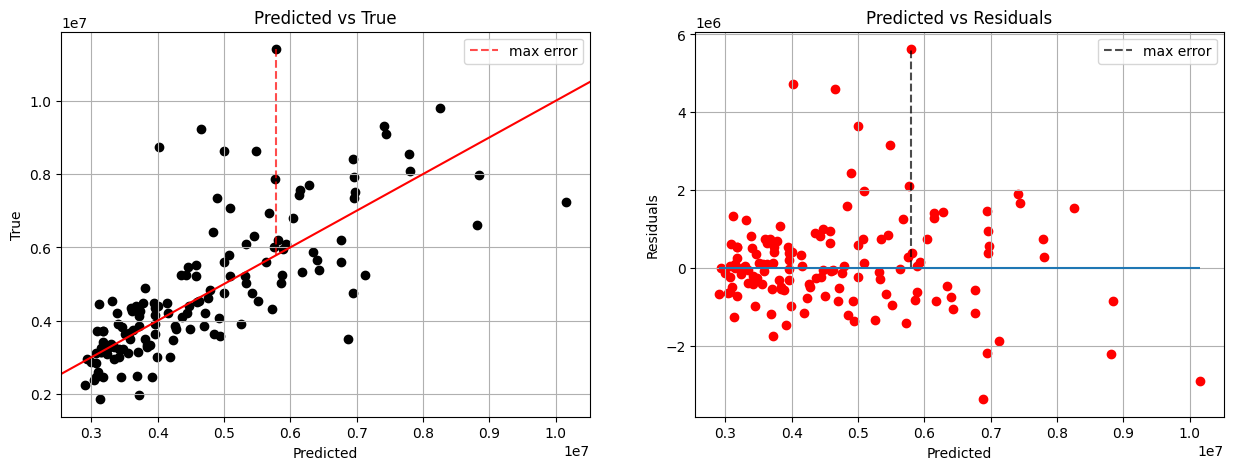

In [10]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [12]:
mask = selected_feat2

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
